<h2> NETFLIX DATA ANALYSIS <h2>

In [1]:
# Importing Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

df = pd.read_csv("/Users/priyanshu/Desktop/projects/Netflix Data Analysis/netflix_dataset.csv")

In [3]:
# Checking the count of rows and columns

total_number_of_rows = df.shape[0]
total_number_of_columns = df.shape[1]


print(f"Total number of rows are : {total_number_of_rows}")
print(f"Total number of columns are : {total_number_of_columns}")

Total number of rows are : 7789
Total number of columns are : 11


In [4]:
# Peeking into top 5 records

df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.size

85679

In [6]:
# Getting all the columns

df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [7]:
# Checking the data types of all the columns of a dataset

df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [8]:
# Checking for info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [9]:
# Checking for any duplicates in the dataset

In [10]:
# Checking the number of duplicate records

duplicates = df.duplicated().sum()

print(f"There are {duplicates} duplicate records")

There are 2 duplicate records


In [11]:
# Find the duplicate records

df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [12]:
# Remove duplicate records

df.drop_duplicates(inplace = True)

In [13]:
# Checking if the duplicate records are dropped

duplicates = df.duplicated().sum()

print(f"There are {duplicates} duplicate records")

There are 0 duplicate records


In [14]:
# Checking for NULL values in the dataset

In [15]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

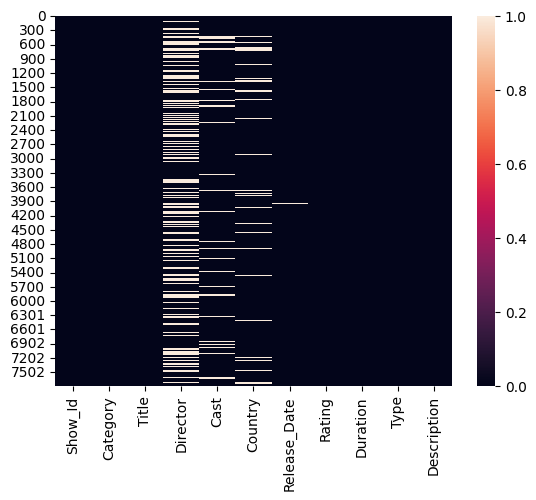

In [16]:
# Showing the NULL values in heatmap using seaborn library
sns.heatmap(df.isnull())
plt.show()

In [17]:
df[df.Title == "House of Cards"][['Show_Id', 'Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [18]:
df[df.Title.str.contains("House of Cards")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [19]:
# In which year highest TV Shows/ Movies were released

In [20]:
# as we have a Release_Date as object type lets create a new columnn with date_time format df['date_of_release']

In [21]:
# Creating a new column
df['date_of_release'] = pd.to_datetime(df["Release_Date"].str.strip(),format="%B %d, %Y")

In [22]:
df["year_of_release"] = df.date_of_release.dt.year

In [23]:
# Applying count function to check the frequency each year
df["year_of_release"].value_counts()

year_of_release
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

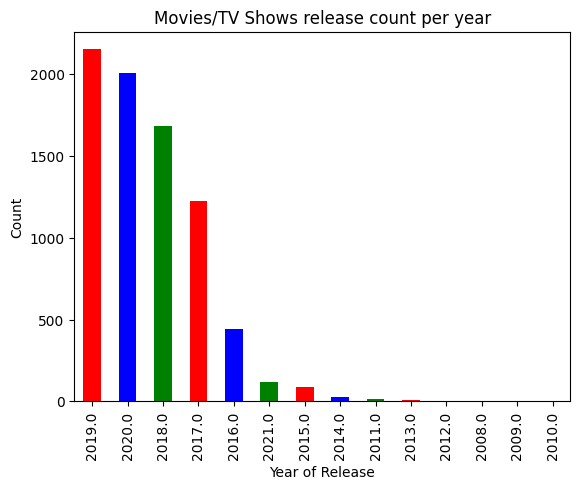

In [24]:
# Lets create a Bar Graph for the same

df["year_of_release"].value_counts().plot(kind = "bar", color = ['r','b','g'])
plt.title("Movies/TV Shows release count per year")
plt.xlabel("Year of Release")
plt.ylabel("Count")
plt.show()

In [25]:
# Get number of TV Shows and Movies are present in the dataset and show with the pie chart

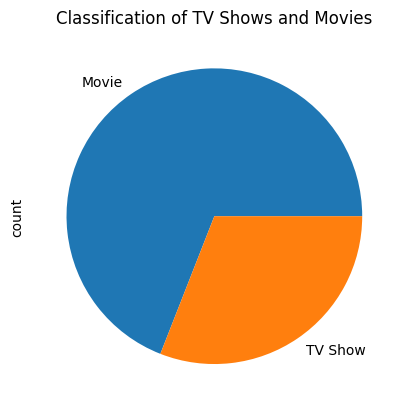

In [26]:
df['Category'].value_counts().plot(kind = 'pie')
plt.title("Classification of TV Shows and Movies")
plt.show()

# Show all the movies released in year 2020

In [27]:
df_movies_2020 = df[(df["year_of_release"] == 2020) & (df["Category"] == "Movie")]
df_movies_2020.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0


In [28]:
print(f"There are {df_movies_2020.shape[0]} movies available to watch on Netflix as per the dataset that are released in 2020")

There are 1312 movies available to watch on Netflix as per the dataset that are released in 2020


# Show movies and TV Shows in India

In [29]:
df_India = df[df.Country.str.contains('India', na = False)]
df_India.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01,2019.0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15,2017.0


In [30]:
print(f"There are total {df_India.shape[0]} items available to watch in India")

There are total 990 items available to watch in India


# Classify the TV Show and movie ratio in India

In [31]:
df.Category[df.Country.str.contains('India', na = False)].value_counts()

Category
Movie      915
TV Show     75
Name: count, dtype: int64

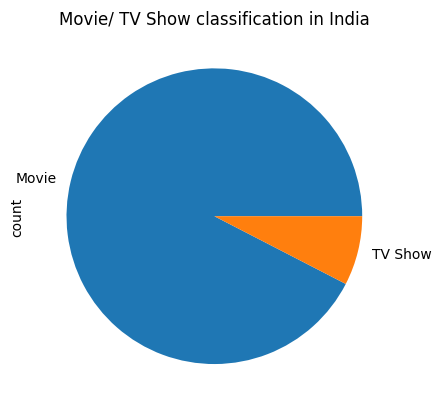

In [32]:
# Plot it in pie chart

df.Category[df.Country.str.contains('India', na = False)].value_counts().plot(kind = 'pie')
plt.title("Movie/ TV Show classification in India")
plt.show()

# Show top 10 directors who give highest number of TV Shows/ Movies

In [33]:
top_10_directors = df["Director"].value_counts().head(10)
top_10_directors

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

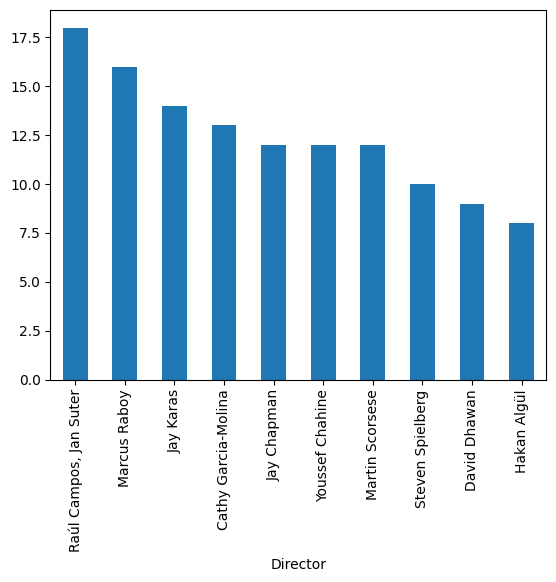

In [34]:
top_10_directors.plot(kind = 'bar')
plt.show()

In [35]:
# Get all the Movies that are comedy or comedies (genre) movies

In [36]:
comedy_movies = df[(df.Category == "Movie") & (df.Type.str.contains(r"Comedies|Comedy"))]
comedy_movies.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29,2019.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0


In [37]:
# Movies and TV Shows that are only comedy
df_comedy_movies_tv = df[df.Type == "Comedies"]
df_comedy_movies_tv.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0


In [38]:
print(f"There are total {df_comedy_movies_tv.shape[0]} comedy movies available to watch")

There are total 97 comedy movies available to watch


# Show the data conutry wise for comedy_movies

In [39]:
comedy_movies.groupby("Country")["Country"].count().sort_values(ascending = False)

Country
United States                      669
India                              299
Egypt                               57
Turkey                              56
United Kingdom                      51
                                  ... 
China, Hong Kong                     1
Argentina, Chile, Peru               1
China, Hong Kong, United States      1
China, India, Nepal                  1
Zimbabwe                             1
Name: Country, Length: 165, dtype: int64

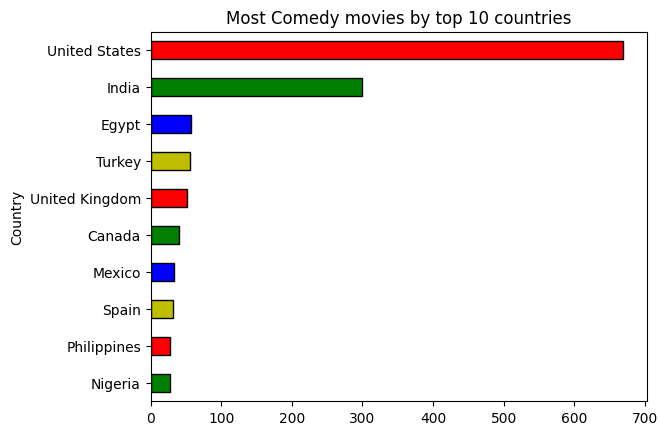

In [40]:
# displaying the top 10 countries that make comedy movies using horizontal bar chart

comedy_movies.groupby("Country")["Country"].count().sort_values(ascending = False).head(10).plot(kind = 'barh', color = ['r', 'g', 'b', 'y'], edgecolor = 'black')
plt.title("Most Comedy movies by top 10 countries")
plt.gca().invert_yaxis() # used to invvert the y-axis
plt.show()



# The above data shows that USA has top most number of comedy movies followed by India and then Egypt

# My favourite actor is Tom Cruise let's c how many movies have he worked on

In [41]:
df[df.Cast.str.contains("Tom Cruise",  na = False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


## Whoa only 2 movies on Netflix, I have had expected more ;)

## Well heard of Jim Carrey?? a legend!! Lets Check out for his movies :P

In [42]:
df[df.Cast.str.contains("Jim Carrey",  na = False)].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
1612,s1613,Movie,Dark Crimes,Alexandros Avranas,"Jim Carrey, Marton Csokas, Charlotte Gainsbour...","United Kingdom, Poland, United States","October 15, 2019",R,93 min,"Dramas, Thrillers",A detective on a cold murder case discovers th...,2019-10-15,2019.0
2839,s2840,Movie,How the Grinch Stole Christmas,Ron Howard,"Jim Carrey, Taylor Momsen, Jeffrey Tambor, Chr...",United States,"June 1, 2017",PG,105 min,"Children & Family Movies, Comedies",The Grinch decides to rob Whoville of Christma...,2017-06-01,2017.0


# This dataset is getting interesting as we dig deeper and deeper :)

Rating!! I am sure you all also check the rating before watching any movie, Let's dig out some of the interesting stuff about the same

In [43]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description',
       'date_of_release', 'year_of_release'],
      dtype='object')

In [44]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

<> Well I did some digging what above code says here is what I found <>

MPAA Film Ratings (US):
    G: General audiences - all ages admitted.
    PG: Parental guidance suggested - some material may not be suitable for children.
    PG-13: Parents strongly cautioned - some material may be inappropriate for children under 13.
    R: Restricted - under 17 requires accompanying parent or adult guardian.
    NC-17: No Children Under 17 - Adults only.

TV Parental Guidelines (US):
    TV-Y: All children.
    TV-Y7: Directed at young children (ages 2-7).
    TV-G: General audience.
    TV-PG: Parental guidance suggested.
    TV-14: Parents TV with parental guidance.
    TV-MA: Mature audience only - may not be suitable for children under 17.

Other:
    NR: Not Rated - material has not been submitted for rating.
    UR: Unrated - may not have been classified for age restrictions.
    TV-Y7-FV: Fantasy Violence - Directed at young children (ages 2-7) with some mild fantasy violence.

My nephew is asking me if she could watch some movies. As there is lots of content available I need to find the suitable one for her. As no adult would be around for a while so I need to find her something that is safe to her. 🐰

# as TV-Y: All children is for all childern let's find out some movies

In [45]:
df[df.Rating == 'TV-Y'].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
55,s56,Movie,100 Things to do Before High School,NaN,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,"November 2, 2019",TV-Y,44 min,Movies,"Led by seventh-grader C.J., three students who...",2019-11-02,2019.0
177,s178,Movie,A Go! Go! Cory Carson Christmas,"Stanley Moore, Alex Woo","Alan C. Lim, Taron C. Hensley, Maisie Benson, ...",United States,"November 27, 2020",TV-Y,22 min,Children & Family Movies,When a familiar-looking stranger crashes in wi...,2020-11-27,2020.0


Found plenty of stuff, lets get something specific for India region

In [46]:
df[(df.Rating == 'TV-Y') & (df.Country == "India")].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
1316,s1317,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 11, 2019",TV-Y,1 Season,Kids' TV,"A brave, energetic little boy with superhuman ...",2019-07-11,2019.0
1377,s1378,TV Show,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),NaN,NaN,India,"April 18, 2020",TV-Y,1 Season,Kids' TV,This educational series for tiny tots features...,2020-04-18,2020.0


In [47]:
df[(df.Rating == 'TV-Y') & (df.Country.str.contains("India", na = False))].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
1316,s1317,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 11, 2019",TV-Y,1 Season,Kids' TV,"A brave, energetic little boy with superhuman ...",2019-07-11,2019.0
1377,s1378,TV Show,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),NaN,NaN,India,"April 18, 2020",TV-Y,1 Season,Kids' TV,This educational series for tiny tots features...,2020-04-18,2020.0


Looks Good!! She could be busy for some time 😊

On top of it lets do some anaysis where we could showcase the data in a bar chart that what is the frequency for each movie rating.
Let's find out. It seems so interesting.

In [48]:
freq_by_rating = df.groupby('Rating')["Rating"].count()
freq_by_rating

Rating
G             39
NC-17          3
NR            84
PG           247
PG-13        386
R            665
TV-14       1931
TV-G         194
TV-MA       2863
TV-PG        806
TV-Y         280
TV-Y7        271
TV-Y7-FV       6
UR             5
Name: Rating, dtype: int64

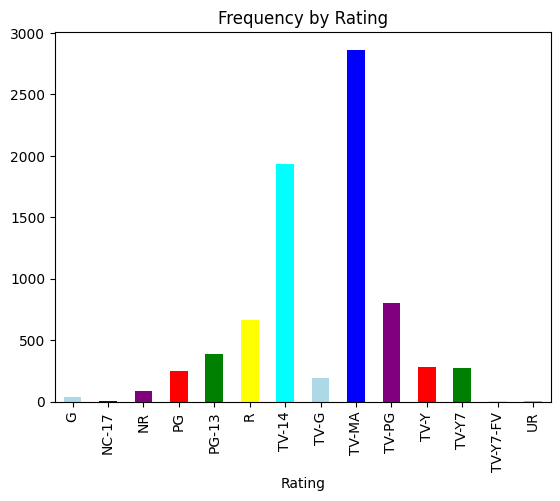

In [49]:
# Lets now showcase the above data in a bar chart

color = ['lightblue', 'blue', 'purple', 'red', 'green', 'yellow', "cyan"]
freq_by_rating.plot(kind = "bar", color = color)
plt.title("Frequency by Rating")
plt.xlabel("Rating")
plt.show()

I have a date tonight. Let's see how many options are available for me for Movie date on Netflix. I would only go for movies for a night 😉

I would go for these two ratings "TV-MA" "NC-17"

In [50]:
df[((df.Rating == "TV-MA") | (df.Rating == "NC-17")) & (df.Category == "Movie")].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0


In [51]:
number_of_mat_adlt = df[((df.Rating == "TV-MA") | (df.Rating == "NC-17")) & (df.Category == "Movie")].shape[0]
print(f"There are total {number_of_mat_adlt} movies available for mature or adult audience")

There are total 1848 movies available for mature or adult audience


In [52]:
df[(df.Rating == 'R') & (df.Category == "TV Show")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016-12-10,2016.0
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


In [53]:
latest_contry_movie = df[(df.Rating == 'G') & (df.Country.str.contains(r"India|United States|Canada")) & (df.year_of_release >= 2020)]
latest_contry_movie.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release
155,s156,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"April 14, 2020",G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2020-04-14,2020.0
227,s228,Movie,A Shaun the Sheep Movie: Farmageddon,"Richard Phelan, Will Becher","Justin Fletcher, John Sparkes, Amalia Vitale, ...","United Kingdom, France, Belgium, United States...","February 14, 2020",G,87 min,"Children & Family Movies, Comedies",Shaun and the flock race to help an adorable a...,2020-02-14,2020.0


In [54]:
print(f"There are total {latest_contry_movie.shape[0]} movies we can watch and that satisfies above criterion")

There are total 11 movies we can watch and that satisfies above criterion


In [55]:
df.Duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [56]:
# Exploding the columns into two new columns
df[["min_or_season", "unit"]] = df.Duration.str.split(" ", expand = True)

In [57]:
# CHanging the datatype

df['min_or_season'] = pd.to_numeric(df['min_or_season'])

In [58]:
# Lets now check the maximum duration of the movie

max_duration = df['min_or_season'].max()
print(f"The maximum duration of the movie available in the above dataset is {max_duration}")

The maximum duration of the movie available in the above dataset is 312


In [59]:
df['unit'].unique()

array(['Seasons', 'min', 'Season'], dtype=object)

In [60]:
# As the min_or_season column contains both Season and minutes so we need to first filter 
max_duration = df[df['unit'] == "min"]["min_or_season"].max()
print(f"The movie with maximum duration in the Netflix dataset is {max_duration}")

The movie with maximum duration in the Netflix dataset is 312


In [61]:
min_duration = df[df['unit'] == "min"]["min_or_season"].min()
print(f"The movie with mimimum duration in the Netflix dataset is {min_duration}")

The movie with mimimum duration in the Netflix dataset is 3


In [62]:
df[df['unit'] == "Seasons"]["min_or_season"].max()

16

In [63]:
tv_shows = df[df.Category  == "TV Show"]
tv_shows.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release,min_or_season,unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0,1,Season


Let's find out the TV Shows by countries

In [64]:
tv_shows.groupby("Country")["Country"].count().sort_values(ascending = False)

Country
United States                     705
United Kingdom                    204
Japan                             157
South Korea                       147
India                              71
                                 ... 
Mexico, Spain                       1
China, Hong Kong                    1
Mauritius, South Africa             1
Malaysia, Singapore, Hong Kong      1
Uruguay, Germany                    1
Name: Country, Length: 183, dtype: int64

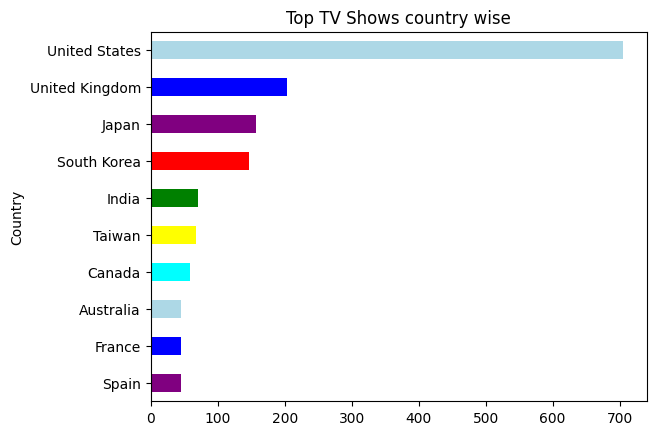

In [65]:
tv_shows.groupby("Country")["Country"].count().sort_values(ascending = False).head(10).plot(kind = 'barh', color = color)
plt.gca().invert_yaxis() # used to invvert the y-axis
plt.title("Top TV Shows country wise")
plt.show()

As we could see from our dataset United States here as well is dominating followed by United Kingdom and then Japan

I want to see a TV Show which could be either Crime TV or Action

In [66]:
df_tv_crime_action = df[(df.Category == 'TV Show' ) & (df.Type.str.contains(r'Action|Crime TV'))]
df_tv_crime_action.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_of_release,year_of_release,min_or_season,unit
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018-11-30,2018.0,1,Season
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019-05-17,2019.0,1,Season


In [67]:
print(f"There are {df_tv_crime_action.shape[0]} options available for the same. Yeah!!🥳🥳 now I could choose the best of them and watch")

There are 541 options available for the same. Yeah!!🥳🥳 now I could choose the best of them and watch


It was fun working on the Netflix Dataset. I enjoyed every bits and pieces. ❤️